In [104]:
# Data managing
import pandas as pd
import numpy as np

# Preprocesing
from sklearn.pipeline import Pipeline

# Evaluation
from sklearn.model_selection import cross_validate

# ML Algorithms
from sklearn.tree import DecisionTreeClassifier

# Visualization
import seaborn as sns

# Enable seeing plots within the notebook
%matplotlib inline

In [105]:
df = pd.read_csv('Input/germanCreditList.csv')
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Id                  1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


DATA EXPLODING

In [107]:
df['Risk'].isnull().any()

False

In [108]:
df['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

TARGET mapping : Risk [good mapped to 0 and bad mapped to 1]

In [109]:
df.loc[df['Risk'] == 'good', 'Risk'] = 0
df.loc[df['Risk'] == 'bad', 'Risk'] = 1
df['Risk'] = df['Risk'].astype(int)

df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,1


In [102]:
df.groupby('Sex').mean()

,Checking_little,Checking_moderate,Checking_null,Checking_rich,Savings_little,Savings_moderate,Savings_null,Savings_quite rich,Savings_rich,Purpose_business,...,Risk,Credit_small,Credit_med,Credit_big,Duration_short,Duration_med,Duration_long,Age_young,Age_adult,Age_old
Sex,,,,,,,,,,,,,,,,,,,,,
female,0.283871,0.277419,0.374194,0.064516,0.625806,0.103226,0.158065,0.051613,0.061290,0.061290,...,0.351613,0.306452,0.664516,0.029032,0.190323,0.641935,0.167742,0.403226,0.477419,0.119355
male,0.269565,0.265217,0.402899,0.062319,0.592754,0.102899,0.194203,0.068116,0.042029,0.113043,...,0.276812,0.224638,0.730435,0.044928,0.175362,0.591304,0.233333,0.166667,0.705797,0.127536


In [110]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

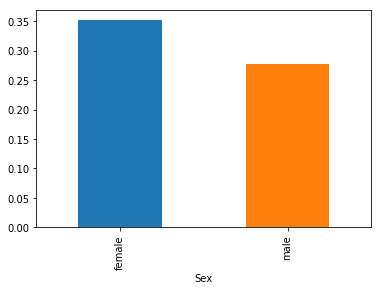

In [111]:
df.groupby('Sex').mean()['Risk'].plot(kind='bar')

In [112]:
df['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [113]:
df.groupby('Housing').mean()['Risk']

Housing
free    0.407407
own     0.260870
rent    0.391061
Name: Risk, dtype: float64

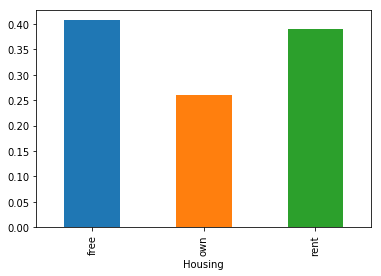

In [114]:
df.groupby('Housing').mean()['Risk'].plot(kind='bar')

In [115]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [116]:
df.groupby('Purpose').mean()['Risk']

Purpose
business               0.350515
car                    0.314540
domestic appliances    0.333333
education              0.389831
furniture/equipment    0.320442
radio/TV               0.221429
repairs                0.363636
vacation/others        0.416667
Name: Risk, dtype: float64

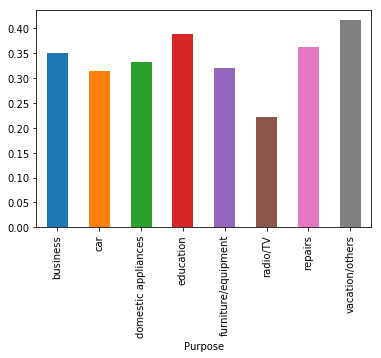

In [117]:
df.groupby('Purpose').mean()['Risk'].plot(kind='bar')

In [118]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [119]:
df['Saving accounts'].fillna('null', inplace=True)

In [120]:
df.groupby('Saving accounts').mean()['Risk']

Saving accounts
little        0.359867
moderate      0.330097
null          0.174863
quite rich    0.174603
rich          0.125000
Name: Risk, dtype: float64

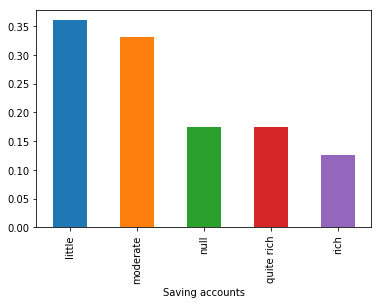

In [121]:
df.groupby('Saving accounts').mean()['Risk'].plot(kind='bar')

In [122]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [123]:
df['Checking account'].fillna('null', inplace=True)

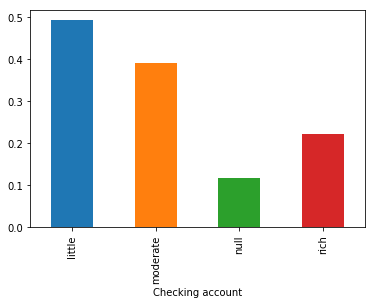

In [124]:
df.groupby('Checking account').mean()['Risk'].plot(kind='bar')

Continous Value data exploration 

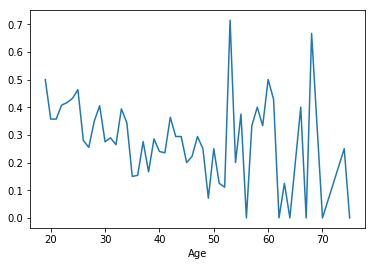

In [125]:
df.groupby('Age').mean()['Risk'].plot()

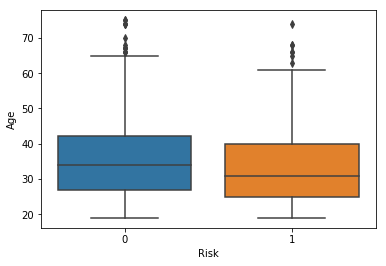

In [126]:
sns.boxplot(x="Risk", y="Age", data=df)

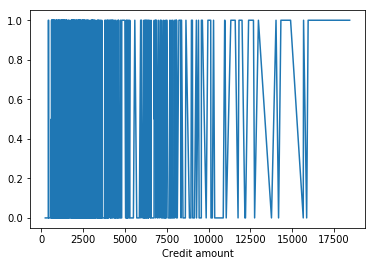

In [127]:
df.groupby('Credit amount').mean()['Risk'].plot()

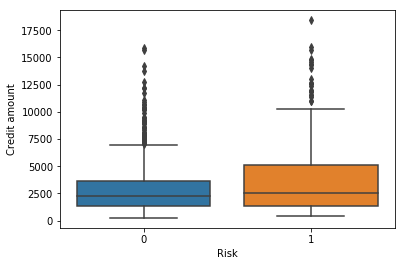

In [128]:
sns.boxplot(x="Risk", y="Credit amount", data=df)

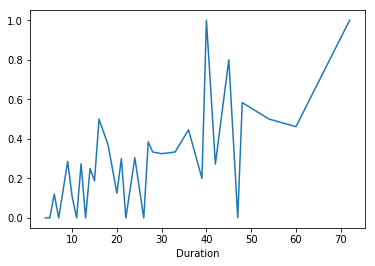

In [129]:
df.groupby('Duration').mean()['Risk'].plot()

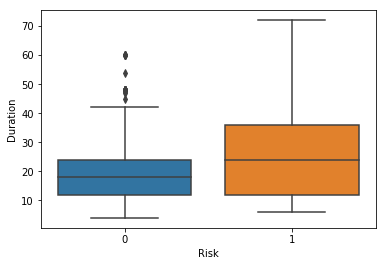

In [130]:
sns.boxplot(x="Risk", y="Duration", data=df)

In [132]:
df['Saving accounts'].fillna('null', inplace=True)
lr_little = df[df['Risk'] == 0].groupby('Saving accounts').count()['Risk']['little']
lr_moderate = df[df['Risk'] == 0].groupby('Saving accounts').count()['Risk']['moderate']
lr_null = df[df['Risk'] == 0].groupby('Saving accounts').count()['Risk']['null']
lr_quite_rich = df[df['Risk'] == 0].groupby('Saving accounts').count()['Risk']['quite rich']
lr_rich = df[df['Risk'] == 0].groupby('Saving accounts').count()['Risk']['rich']
print(lr_little)
print(lr_moderate)
print(lr_null)
print(lr_quite_rich)
print(lr_rich)

386
69
151
52
42


In [133]:
df['Checking account'].fillna('null', inplace=True)
lr_little = df[df['Risk'] == 0].groupby('Checking account').count()['Risk']['little']
lr_moderate = df[df['Risk'] == 0].groupby('Checking account').count()['Risk']['moderate']
lr_null = df[df['Risk'] == 0].groupby('Checking account').count()['Risk']['null']
lr_rich = df[df['Risk'] == 0].groupby('Checking account').count()['Risk']['rich']
print(lr_little)
print(lr_moderate)
print(lr_null)
print(lr_rich)

139
164
348
49


VECTORISATION BASED ON DATA EXPLORATION

INT fields : Age , Credit amount, Duration

In [131]:
df['Credit_small'] = np.zeros(1000, dtype=int)
df['Credit_med'] = np.zeros(1000, dtype=int)
df['Credit_big'] = np.zeros(1000, dtype=int)
df.loc[df['Credit amount'] < 1365.5, 'Credit_small'] = 1
df.loc[(df['Credit amount'] >= 1365.5) & (df['Credit amount'] < 10000), 'Credit_med'] = 1
df.loc[df['Credit amount'] >= 10000, 'Credit_big'] = 1

df['Duration_short'] = np.zeros(1000, dtype=int)
df['Duration_med'] = np.zeros(1000, dtype=int)
df['Duration_long'] = np.zeros(1000, dtype=int)
df.loc[df['Duration'] < 12, 'Duration_short'] = 1
df.loc[(df['Duration'] >= 12) & (df['Duration'] < 30), 'Duration_med'] = 1
df.loc[df['Duration'] >= 30, 'Duration_long'] = 1

df['Age_young'] = np.zeros(1000, dtype=int)
df['Age_adult'] = np.zeros(1000, dtype=int)
df['Age_old'] = np.zeros(1000, dtype=int)
df.loc[df['Age'] < 27, 'Age_young'] = 1
df.loc[(df['Age'] >= 27) & (df['Age'] < 50), 'Age_adult'] = 1
df.loc[df['Age'] >= 50, 'Age_old'] = 1

df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit_small,Credit_med,Credit_big,Duration_short,Duration_med,Duration_long,Age_young,Age_adult,Age_old
0,0,67,male,2,own,null,little,1169,6,radio/TV,0,1,0,0,1,0,0,0,0,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1,0,1,0,0,0,1,1,0,0
2,2,49,male,1,own,little,null,2096,12,education,0,0,1,0,0,1,0,0,1,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0,0,1,0,0,0,1,0,1,0
4,4,53,male,2,free,little,little,4870,24,car,1,0,1,0,0,1,0,0,0,1


OBJECT field : [Exploding columns based on values]

Those having NaN values -  Saving accounts, Checking account

Categorical value - Job, Housing, Purpose 

In [134]:
df = pd.get_dummies(df['Job'], prefix='Job').merge(df, left_index=True, right_index=True)
df = pd.get_dummies(df['Housing'], prefix='Housing').merge(df, left_index=True, right_index=True)
df = pd.get_dummies(df['Purpose'], prefix='Purpose').merge(df, left_index=True, right_index=True)
df = pd.get_dummies(df['Saving accounts'], prefix='Savings').merge(df, left_index=True, right_index=True)
df = pd.get_dummies(df['Checking account'], prefix='Checking').merge(df, left_index=True, right_index=True)
df.head()

,Checking_little,Checking_moderate,Checking_null,Checking_rich,Savings_little,Savings_moderate,Savings_null,Savings_quite rich,Savings_rich,Purpose_business,...,Risk,Credit_small,Credit_med,Credit_big,Duration_short,Duration_med,Duration_long,Age_young,Age_adult,Age_old
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1


Feature Selection

In [135]:
features = ['Checking_little', 'Checking_null', 'Checking_moderate', 'Savings_little', 'Savings_null', 'Purpose_radio/TV', 'Housing_own',
            'Credit_big', 'Duration_short', 'Age_young']

In [136]:
X = df[features].values
y = df['Risk'].values

Model Accuracy

In [137]:
less_than_1 = [.0001,.001,.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
more_than_1 = list(np.arange(1,11))
classifier = DecisionTreeClassifier()
params = {'clf__alpha': less_than_1 + more_than_1}
model = Pipeline([('clf', classifier)])

In [138]:

# Cross Validate
def evaluate(estimator, data, label):    
    scores = cross_validate(estimator, data, label, cv=3, 
                            scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], 
                            n_jobs=-1)
    print(scores)
    accuracy_score = scores['test_accuracy']
    precision_score = scores['test_precision_weighted']
    recall_score = scores['test_recall_weighted']
    f1_score = scores['test_f1_weighted']

    print("Accuracy score: {0:.3f} (+/- {1:.3f})".format(accuracy_score.mean(), accuracy_score.std()))
    print("Precision score: {0:.3f} (+/- {1:.3f})".format(precision_score.mean(), precision_score.std()))
    print("Recall score: {0:.3f} (+/- {1:.3f})".format(recall_score.mean(), recall_score.std()))
    print("F1 score: {0:.3f} (+/- {1:.3f})".format(f1_score.mean(), f1_score.std()))

In [139]:
evaluate(model, X, y)

{'train_precision_weighted': array([0.78150559, 0.78679181, 0.76723516]), 'test_recall_weighted': array([0.67964072, 0.68168168, 0.64864865]), 'test_f1_weighted': array([0.66907559, 0.67878244, 0.60835608]), 'test_precision_weighted': array([0.6629049 , 0.67631942, 0.59385982]), 'train_recall_weighted': array([0.78828829, 0.7916042 , 0.77211394]), 'test_accuracy': array([0.67964072, 0.68168168, 0.64864865]), 'train_f1_weighted': array([0.78320824, 0.78848537, 0.74433164]), 'fit_time': array([0.02319193, 0.03691316, 0.0257504 ]), 'train_accuracy': array([0.78828829, 0.7916042 , 0.77211394]), 'score_time': array([0.08206391, 0.02044964, 0.02319932])}
Accuracy score: 0.670 (+/- 0.015)
Precision score: 0.644 (+/- 0.036)
Recall score: 0.670 (+/- 0.015)
F1 score: 0.652 (+/- 0.031)
